# Infinite runner

In [21]:
import pandas as pd
from radcad import Experiment
from radcad.engine import Engine
import openai
import json
import os

In [22]:
from infinite_runner_radcad import model, simulation, experiment

In [23]:
df = pd.DataFrame(experiment.run())
df.head(20)

,distance,coins,difficulty_factor,player_crashes,simulation,subset,run,substep,timestep
0,0.0,0.0,0.0,0,0,0,1,0,0
1,5.0,0.0,0.0,0,0,0,1,1,1
2,10.0,1.0,1.0,0,0,0,1,1,2
3,15.0,2.0,1.0,0,0,0,1,1,3
4,20.0,3.0,2.0,0,0,0,1,1,4
5,25.0,4.0,2.0,1,0,0,1,1,5
6,25.0,4.0,2.0,1,0,0,1,1,6
7,25.0,4.0,2.0,1,0,0,1,1,7
8,25.0,4.0,2.0,1,0,0,1,1,8
9,25.0,4.0,2.0,1,0,0,1,1,9


In [24]:
simulation.model.params

{'crash_chance': [60.0], 'crash_increase': [22.0]}

## Start chatting with the agents 

### Input your openai key

In [5]:
from cadcad_gpt import cadcad_gpt
openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_key = 'sk-<your key here>'

### You can get it to fetch information about the model from the documentation

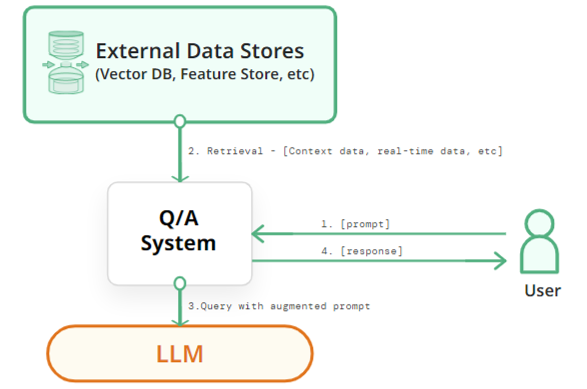

In [6]:
cadcad_gpt("what are the assumptions of the model?")

Planner Agent:
I have made a plan to follow: 

 1) use the function model_documentation to fetch the assumptions in this model. 


Executor Agent:
Thought: My task is to  1) use the function model_documentation to fetch the assumptions in this model. 
Action: I should call model_documentation function with these {'question': 'What are the assumptions in this model?'} arguments
Observation:  The assumptions in this model are:
- The game environment is two-dimensional.
- The character's movements are restricted to jumping and sliding.
- Obstacles and power-ups appear at predefined intervals.
- Collision detection is based on basic geometric shapes.


In [7]:
cadcad_gpt("what are the metrics and params of the model in the docs?")

Planner Agent:
I have made a plan to follow: 

 1) use the function model_documentation to fetch the metrics and params in the model. 


Executor Agent:
Thought: My task is to  1) use the function model_documentation to fetch the metrics and params in the model. 
Action: I should call model_documentation function with these {'question': 'What are the metrics and parameters in the model?'} arguments
Observation:  The metrics in the model are:
1. Score
2. Distance Traveled
3. Coins Collected
4. Time Survived
5. High Score

The parameters in the model are:
1. Character Speed
2. Obstacle Frequency
3. Jump Height
4. Power-up Spawn Rate
5. Game Environment
6. Collision Detection Precision


### You can fetch the parameter values currently set in the experiment object

In [8]:
cadcad_gpt("what are the current values of all the params?")

Planner Agent:
I have made a plan to follow: 

 1) we use the function model_info to fetch all the parameters 


Executor Agent:
Thought: My task is to  1) we use the function model_info to fetch all the parameters 
Action: I should call model_info function with these {'param': 'all'} arguments
Observation:  {'crash_chance': [10], 'crash_increase': [1]}


In [9]:
cadcad_gpt("what are the current values of crash_chance param?")

Planner Agent:
I have made a plan to follow: 

 1) we use the function model_info to fetch the crash_chance parameter 


Executor Agent:
Thought: My task is to  1) we use the function model_info to fetch the crash_chance parameter 
Action: I should call model_info function with these {'param': 'crash_chance'} arguments
Observation:  crash_chance = [10]


### You can analyze the dataframe 

In [10]:
cadcad_gpt("what is the average value of the difficulty factor in the dataframe?")

Planner Agent:
I have made a plan to follow: 

 1) we use the function analyze_dataframe to calculate the average value of the difficulty factor column in the dataframe. 


Executor Agent:
Thought: My task is to  1) we use the function analyze_dataframe to calculate the average value of the difficulty factor column in the dataframe. 
Action: I should call analyze_dataframe function with these {'question': 'What is the average value of the difficulty factor column in the dataframe?'} arguments
Analyzer Agent:


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['difficulty_factor'].mean()"}`


6.804878048780488The average value of the difficulty factor column in the dataframe is approximately 6.805.

> Finished chain.
Observation:  The average value of the difficulty factor column in the dataframe is approximately 6.805.


In [11]:
df['difficulty_factor'].mean()

6.804878048780488

In [12]:
cadcad_gpt("what is the maximum value of the coins column?")

Planner Agent:
I have made a plan to follow: 

 1) we use the function analyze_dataframe to fetch the maximum value of the coins column. 


Executor Agent:
Thought: My task is to  1) we use the function analyze_dataframe to fetch the maximum value of the coins column. 
Action: I should call analyze_dataframe function with these {'question': 'What is the maximum value of the coins column?'} arguments
Analyzer Agent:


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['coins'].max()"}`


25.0The maximum value of the `coins` column is 25.

> Finished chain.
Observation:  The maximum value of the `coins` column is 25.


In [13]:
df['coins'].max()

25.0

In [14]:
cadcad_gpt("What timestep did the player crash value change?")

Planner Agent:
I have made a plan to follow: 

 1) use the function analyze_dataframe to fetch the timestep when the player crash value changed. 


Executor Agent:
Thought: My task is to  1) use the function analyze_dataframe to fetch the timestep when the player crash value changed. 
Action: I should call analyze_dataframe function with these {'question': 'timestep when the player crash value changed'} arguments
Analyzer Agent:


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[df['player_crashes'].diff() != 0]['timestep']"}`


0      0
18    18
Name: timestep, dtype: int64The timestep when the player crash value changed is 0 and 18.

> Finished chain.
Observation:  The timestep when the player crash value changed is 0 and 18.


In [15]:
df.head(20)

,distance,coins,difficulty_factor,player_crashes,simulation,subset,run,substep,timestep
0,0.0,0.0,0.0,0,0,0,1,0,0
1,5.0,0.0,0.0,0,0,0,1,1,1
2,10.0,1.0,1.0,0,0,0,1,1,2
3,15.0,2.0,1.0,0,0,0,1,1,3
4,20.0,3.0,2.0,0,0,0,1,1,4
5,25.0,4.0,2.0,0,0,0,1,1,5
6,30.0,5.0,3.0,0,0,0,1,1,6
7,35.0,6.0,3.0,0,0,0,1,1,7
8,40.0,7.0,4.0,0,0,0,1,1,8
9,45.0,8.0,4.0,0,0,0,1,1,9


### You can change parameters

In [16]:
model.params['crash_chance']

[10]

In [25]:
cadcad_gpt("change the crash chance parameter to 12")

Planner Agent:
I have made a plan to follow: 

 1) We use function change_param to change the crash chance parameter to 12. 


Executor Agent:
Thought: My task is to  1) We use function change_param to change the crash chance parameter to 12. 
Action: I should call change_param function with these {'param': 'crash_chance', 'value': '12'} arguments
Observation:  new crash_chance value is 12.0 and the simulation dataframe is updated


In [26]:
model.params['crash_chance']

[12.0]

### You can chain changing of parameters with analyzing dataframe

In [27]:
cadcad_gpt("change the crash chance parameter to 60, and tell me the number of coins in the final row")

Planner Agent:
I have made a plan to follow: 

 1) Use the function change_param to change the crash chance parameter to 60.
2) Use the function analyze_dataframe to get the number of coins in the final row. 


Executor Agent:
Thought: My task is to  1) Use the function change_param to change the crash chance parameter to 60.
Action: I should call change_param function with these {'param': 'crash_chance', 'value': '60'} arguments
Observation:  new crash_chance value is 60.0 and the simulation dataframe is updated
Executor Agent:
Thought: My task is to 2) Use the function analyze_dataframe to get the number of coins in the final row. 
Action: I should call analyze_dataframe function with these {'question': 'What is the number of coins in the final row?'} arguments
Analyzer Agent:


> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df['coins'].iloc[-1]"}`


4.0The number of coins in the final row is 4.

> Finished chain.
Observation:  The number of coins

In [20]:
cadcad_gpt("whats the current value of crash increase param, change it to 22, and tell me when the crash column changed to 1?")

Planner Agent:
I have made a plan to follow: 

 1) we use the function model_info to fetch the crash_increase parameter.
2) we use the function change_param to change the crash_increase parameter to 22.
3) we use the function analyze_dataframe to find the first occurrence of the crash column being equal to 1.


Executor Agent:
Thought: My task is to  1) we use the function model_info to fetch the crash_increase parameter.
Action: I should call model_info function with these {'param': 'crash_increase'} arguments
Observation:  crash_increase = [1]
Executor Agent:
Thought: My task is to 2) we use the function change_param to change the crash_increase parameter to 22.
Action: I should call change_param function with these {'param': 'crash_increase', 'value': '22'} arguments
Observation:  new crash_increase value is 22.0 and the simulation dataframe is updated
Executor Agent:
Thought: My task is to 3) we use the function analyze_dataframe to find the first occurrence of the crash column bei